In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets as sd
import sklearn.linear_model as lm
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.model_selection as ms
import sklearn.metrics as sm




In [2]:
iris = sd. load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data["target"]=iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
data.pivot_table(index="target",values=iris.feature_names)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
target,,,,
0,1.462,0.246,5.006,3.428
1,4.260,1.326,5.936,2.770
2,5.552,2.026,6.588,2.974


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

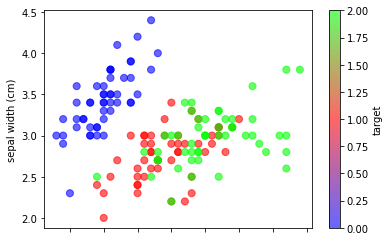

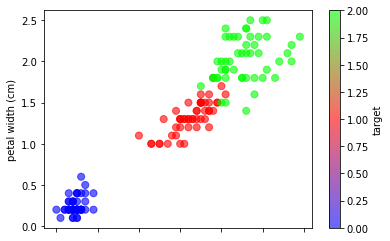

In [6]:
#可视化
data.plot.scatter(x=iris.feature_names[0],y=iris.feature_names[1],c="target",cmap="brg",s=50,alpha=0.6)
data.plot.scatter(x=iris.feature_names[2],y=iris.feature_names[3],c="target",cmap="brg",s=50,alpha=0.6)

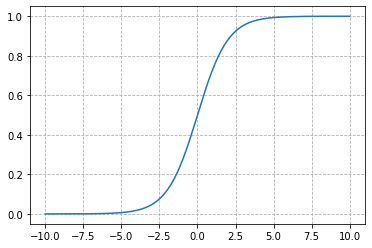

In [7]:
xs = np.linspace(-10,10,200)
ys = 1/(1+np.exp(-1*xs))
plt.grid(linestyle="--")
plt.plot(xs,ys)

# 逻辑回归模型

In [8]:
x = data.tail(150).iloc[:,:-1] #取后100个数据，只涉及二分类
y = data.tail(150)["target"] #取后100个数据，只涉及二分类

train_x,test_x,train_y,test_y = ms.train_test_split(x,y,test_size=0.2,random_state=7,stratify=y)
#stratify=y，将训练集和检测集按类型等比例抽取，防止训练于检测样本类型分布不匹配！
print(train_x.shape)
print(test_x.shape)
print(test_y.value_counts())

(120, 4)
(30, 4)
2    10
0    10
1    10
Name: target, dtype: int64


In [9]:
model_logic = lm.LogisticRegression(solver="liblinear",C=0.5)

#做5次交叉验证
scores = ms.cross_val_score(model_logic,x,y,cv=5,scoring="accuracy")
print("5次交叉验证精确度分数：",scores.mean())
scores = ms.cross_val_score(model_logic,x,y,cv=5,scoring="precision_weighted")
print("5次交叉验证查准率分数：",scores.mean())
scores = ms.cross_val_score(model_logic,x,y,cv=5,scoring="recall_weighted")
print("5次交叉验证召回率分数：",scores.mean())
scores = ms.cross_val_score(model_logic,x,y,cv=5,scoring="f1_weighted")
print("5次交叉验证f1分数：",scores.mean())


"""
构建逻辑回归器
solver: 用来指明损失函数的优化方法, sklearn自带了如下几种:
    liblinear: 坐标轴下降法来迭代优化损失函数
    newton-cg: 牛顿法的一种
    bfgs: 拟牛顿法
    sag: 随机平均梯度下降(适合样本量大的情况)
    
penalty: 参数可选择的值为"11"和"12"。与 solver有关。
    如果是L2正则化,所有优化算法都可用。
    如果是L1正则化,只能使用"liblinear"。
C: 该参数可以控制正则强度,值越小正则强度越大,可以防止过拟合。
"""
model_logic.fit(train_x,train_y)
pred_test_y = model_logic.predict(test_x)

#评估 模型准确率
print((pred_test_y==test_y).sum()/test_y.size)


5次交叉验证精确度分数： 0.9466666666666665
5次交叉验证查准率分数： 0.9563325563325563
5次交叉验证召回率分数： 0.9466666666666665
5次交叉验证f1分数： 0.9459202399032793
0.9333333333333333


## 针对测试集结果，利用混淆矩阵评估

In [10]:
m = sm.confusion_matrix(test_y,pred_test_y)
m

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

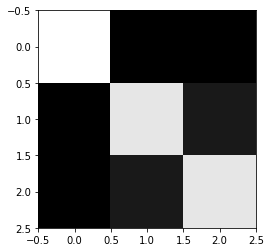

In [11]:
plt.imshow(m,cmap="gray")

## 针对测试集结果，利用分类报告评估

In [12]:
cr = sm.classification_report(test_y,pred_test_y)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## 基于基尼系数决策树分类模型

In [13]:
model_tree=st.DecisionTreeClassifier(max_depth=3,min_samples_split=3,random_state=7)

#做5次交叉验证
scores = ms.cross_val_score(model_tree,x,y,cv=5,scoring="accuracy")
print("5次交叉验证精确度分数：",scores.mean())
scores = ms.cross_val_score(model_tree,x,y,cv=5,scoring="precision_weighted")
print("5次交叉验证查准率分数：",scores.mean())
scores = ms.cross_val_score(model_tree,x,y,cv=5,scoring="recall_weighted")
print("5次交叉验证召回率分数：",scores.mean())
scores = ms.cross_val_score(model_tree,x,y,cv=5,scoring="f1_weighted")
print("5次交叉验证f1分数：",scores.mean())


model_tree.fit(train_x,train_y)
pred_test_y = model_tree.predict(test_x)

m = sm.confusion_matrix(test_y,pred_test_y)
print(m)
cr = sm.classification_report(test_y,pred_test_y)
print(cr)



5次交叉验证精确度分数： 0.96
5次交叉验证查准率分数： 0.9634343434343433
5次交叉验证召回率分数： 0.96
5次交叉验证f1分数： 0.9598319029897977
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 基于随机森林分类模型

In [14]:
model_RF=se.RandomForestClassifier(max_depth=3,min_samples_split=3,n_estimators=400,random_state=7)

#做5次交叉验证
scores = ms.cross_val_score(model_RF,x,y,cv=5,scoring="accuracy")
print("5次交叉验证精确度分数：",scores.mean())
scores = ms.cross_val_score(model_RF,x,y,cv=5,scoring="precision_weighted")
print("5次交叉验证查准率分数：",scores.mean())
scores = ms.cross_val_score(model_RF,x,y,cv=5,scoring="recall_weighted")
print("5次交叉验证召回率分数：",scores.mean())
scores = ms.cross_val_score(model_RF,x,y,cv=5,scoring="f1_weighted")
print("5次交叉验证f1分数：",scores.mean())


model_RF.fit(train_x,train_y)
pred_test_y = model_RF.predict(test_x)

m = sm.confusion_matrix(test_y,pred_test_y)
print(m)
cr = sm.classification_report(test_y,pred_test_y)
print(cr)

5次交叉验证精确度分数： 0.9533333333333334
5次交叉验证查准率分数： 0.9572390572390571
5次交叉验证召回率分数： 0.9533333333333334
5次交叉验证f1分数： 0.9531151110098477
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 基于Ada_Boost分类模型

In [15]:
model_AdaBoost=se.AdaBoostClassifier(model_tree,n_estimators=400,random_state=7)

#做5次交叉验证
scores = ms.cross_val_score(model_AdaBoost,x,y,cv=5,scoring="accuracy")
print("5次交叉验证精确度分数：",scores.mean())
scores = ms.cross_val_score(model_AdaBoost,x,y,cv=5,scoring="precision_weighted")
print("5次交叉验证查准率分数：",scores.mean())
scores = ms.cross_val_score(model_AdaBoost,x,y,cv=5,scoring="recall_weighted")
print("5次交叉验证召回率分数：",scores.mean())
scores = ms.cross_val_score(model_AdaBoost,x,y,cv=5,scoring="f1_weighted")
print("5次交叉验证f1分数：",scores.mean())


model_AdaBoost.fit(train_x,train_y)
pred_test_y = model_AdaBoost.predict(test_x)

m = sm.confusion_matrix(test_y,pred_test_y)
print(m)
cr = sm.classification_report(test_y,pred_test_y)
print(cr)

5次交叉验证精确度分数： 0.9600000000000002
5次交叉验证查准率分数： 0.9622895622895623
5次交叉验证召回率分数： 0.9600000000000002
5次交叉验证f1分数： 0.9598997493734336
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 基于GBDT分类模型

In [16]:
model_GBDT=se.GradientBoostingClassifier(max_depth=3,min_samples_split=3,n_estimators=400,random_state=7)

#做5次交叉验证
scores = ms.cross_val_score(model_GBDT,x,y,cv=5,scoring="accuracy")
print("5次交叉验证精确度分数：",scores.mean())
scores = ms.cross_val_score(model_GBDT,x,y,cv=5,scoring="precision_weighted")
print("5次交叉验证查准率分数：",scores.mean())
scores = ms.cross_val_score(model_GBDT,x,y,cv=5,scoring="recall_weighted")
print("5次交叉验证召回率分数：",scores.mean())
scores = ms.cross_val_score(model_GBDT,x,y,cv=5,scoring="f1_weighted")
print("5次交叉验证f1分数：",scores.mean())


model_GBDT.fit(train_x,train_y)
pred_test_y = model_GBDT.predict(test_x)

m = sm.confusion_matrix(test_y,pred_test_y)
print(m)
cr = sm.classification_report(test_y,pred_test_y)
print(cr)

5次交叉验证精确度分数： 0.9600000000000002
5次交叉验证查准率分数： 0.9622895622895623
5次交叉验证召回率分数： 0.9600000000000002
5次交叉验证f1分数： 0.9598997493734336
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

